# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    
    
    
    
    
    
    
    
    

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
# reading data, this is the code from github
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen
    
URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"

In [3]:
if not os.path.exists(DATA_FOLDER):
    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())
    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

In [4]:
# This part is the skeleton for the sentiment analysis
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
import numpy as np

In [96]:
movie_reviews_data_folder = "./txt_sentoken"
dataset = load_files(movie_reviews_data_folder, shuffle = False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [114]:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, 
                                                          dataset.target, test_size=0.25, random_state=None)

In [98]:
pipeline = Pipeline([('vect', CountVectorizer(min_df = 3, max_df = 0.95)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC(C=1000)),
])

text_clf = pipeline.fit(docs_train, y_train)

In [99]:
predicted = text_clf.predict(docs_test)

In [100]:
np.mean(predicted == y_test)
#average accuracy

0.81599999999999995

In [19]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__C': (1e2, 1e3),
}

grid_search = GridSearchCV(text_clf, parameters, n_jobs=-1)

grid_search.fit(docs_train, y_train)
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'% (grid_search.cv_results_['params'][i], 
                                                        grid_search.cv_results_['mean_test_score'][i], 
                                                        grid_search.cv_results_['std_test_score'][i]))

0 params - {'clf__C': 100.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.02
1 params - {'clf__C': 100.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.02
2 params - {'clf__C': 100.0, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.02
3 params - {'clf__C': 100.0, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.02
4 params - {'clf__C': 1000.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.02
5 params - {'clf__C': 1000.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.02
6 params - {'clf__C': 1000.0, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.02
7 params - {'clf__C': 1000.0, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.02


In [16]:
y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))
# we can see the result is really good, achieving a 85% f1 score.

             precision    recall  f1-score   support

        neg       0.86      0.85      0.85       258
        pos       0.84      0.85      0.85       242

avg / total       0.85      0.85      0.85       500



In [18]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[220  38]
 [ 37 205]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

TF-IDF is a way to measure how important one word is in this document. TF means term frequency, which is the word's total occurance in one document. IDF stands for Inverse Document Frequency, which is obtained by log(total number of ducuments/ documetns containing this word). The TF-IDF = TF*IDF

In [23]:
# comparison
tfidf_vect = TfidfVectorizer()
train_tfidf_vect = tfidf_vect.fit(docs_train, y_train)
train_tfidf_vect
#TF-idf on the training docs
print('The number of vocabulary',len(train_tfidf_vect.vocabulary_))
print('The number of stopwords', len(train_tfidf_vect.stop_words_))

The number of vocabulary 35316
The number of stopwords 0


In [24]:
tfidf_vect_2 = TfidfVectorizer(min_df=5, max_df=0.9)
train_tfidf_vect_2 = tfidf_vect_2.fit(docs_train, y_train)

print('The number of vocabulary', len(train_tfidf_vect_2.vocabulary_))
print('The number of stopwords', len(train_tfidf_vect_2.stop_words_))
print('Total:',len(train_tfidf_vect_2.vocabulary_)+len(train_tfidf_vect_2.stop_words_))

The number of vocabulary 11260
The number of stopwords 24056
Total: 35316


Having a constraint on min_df and max_df would reduce the number of vocabulary. Words would be treated as stop words if its frequency is beyond the threshold.

    min_df(max_df): "When building the vocabulary ignore terms that have a document frequency strictly higher(lower) than the given threshold. f float, the parameter represents a proportion of documents, integer absolute counts."
    --From http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [72]:
tfidf_vect_3 = TfidfVectorizer(ngram_range=(1, 1))
docs_simple = 'I feel like crying and I want to sleep.'
train_tfidf_vect_3 = tfidf_vect_3.fit([docs_simple], y_train[:1])
count = 0
print('The number of vocabulary', len(train_tfidf_vect_3.vocabulary_))
print('Print fitted words')
for i in train_tfidf_vect_3.vocabulary_.keys():
    count+=1
    print('Word No.', str(count), i)
    if count>=10:
        break
#print('total number of stopwords', len(train_tfidf_vect_3.stop_words_))
#print(len(train_tfidf_vect_3.vocabulary_)+len(train_tfidf_vect_3.stop_words_))

The number of vocabulary 7
Print fitted words
Word No. 1 feel
Word No. 2 like
Word No. 3 crying
Word No. 4 and
Word No. 5 want
Word No. 6 to
Word No. 7 sleep


In [73]:
tfidf_vect_3 = TfidfVectorizer(ngram_range=(1, 2))
train_tfidf_vect_3 = tfidf_vect_3.fit([docs_simple], y_train[:1])
count = 0
print('The number of vocabulary', len(train_tfidf_vect_3.vocabulary_))
print('Print ten fitted words')
for i in train_tfidf_vect_3.vocabulary_.keys():
    count+=1
    print('Word No.', str(count), i)
    if count>=10:
        break

The number of vocabulary 13
Print ten fitted words
Word No. 1 feel
Word No. 2 like
Word No. 3 crying
Word No. 4 and
Word No. 5 want
Word No. 6 to
Word No. 7 sleep
Word No. 8 feel like
Word No. 9 like crying
Word No. 10 crying and


In [74]:
tfidf_vect_3 = TfidfVectorizer(ngram_range=(2, 2))
train_tfidf_vect_3 = tfidf_vect_3.fit([docs_simple], y_train[:1])
count = 0
print('The number of vocabulary', len(train_tfidf_vect_3.vocabulary_))
print('Print fitted words')
for i in train_tfidf_vect_3.vocabulary_.keys():
    count+=1
    print('Word No.', str(count), i)
    if count>=10:
        break

The number of vocabulary 6
Print fitted words
Word No. 1 feel like
Word No. 2 like crying
Word No. 3 crying and
Word No. 4 and want
Word No. 5 want to
Word No. 6 to sleep


In [75]:
tfidf_vect_3 = TfidfVectorizer(ngram_range=(2, 3))
train_tfidf_vect_3 = tfidf_vect_3.fit([docs_simple], y_train[:2])
count = 0
print('The number of vocabulary', len(train_tfidf_vect_3.vocabulary_))
print('Print ten fitted words')
for i in train_tfidf_vect_3.vocabulary_.keys():
    count+=1
    print('Word No.', str(count), i)
    if count>=10:
        break

The number of vocabulary 11
Print ten fitted words
Word No. 1 feel like
Word No. 2 like crying
Word No. 3 crying and
Word No. 4 and want
Word No. 5 want to
Word No. 6 to sleep
Word No. 7 feel like crying
Word No. 8 like crying and
Word No. 9 crying and want
Word No. 10 and want to


So, ngram_range(x,y) can generate vocabulary with length from x to y, and the stopwords are removed.

*------------------------

## Problem 3 (20 points): Machine learning algorithms



* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [79]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }

In [118]:
vectorizer = TfidfVectorizer(parameters, min_df=3, max_df=0.95, stop_words='english')

In [119]:
fit_pipe = Pipeline([
    ('vect', vectorizer),
])
fit_pipe.fit(docs_train, y_train)
Xtrain = fit_pipe.fit_transform(docs_train, y_train)
Xtest = fit_pipe.transform(docs_test)

In [116]:
Xtrain
#compute Xtrain

<1500x15722 sparse matrix of type '<class 'numpy.float64'>'
	with 344258 stored elements in Compressed Sparse Row format>

In [103]:
Xtest
#Compute Xtest

<500x15772 sparse matrix of type '<class 'numpy.float64'>'
	with 110050 stored elements in Compressed Sparse Row format>

In [120]:
# LinearSVC
# KNeighborsClassifier
# Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
# first trial
lsvc = LinearSVC()
parameters = {
              'C': (1e2, 1e3),
}
grid_search_lsvc = GridSearchCV(lsvc, parameters, n_jobs=-1)
grid_search_lsvc.fit(Xtrain, y_train)
pred1 = grid_search_lsvc.predict(Xtest)

np.mean(pred1 == y_test)
print(metrics.classification_report(y_test, pred1))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82       256
          1       0.80      0.84      0.82       244

avg / total       0.82      0.82      0.82       500



In [121]:
# second trial
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(Xtrain, y_train)
parameters = {
    'n_neighbors': (3, 5, 10),
}

grid_search_knn = GridSearchCV(knn_clf, parameters, n_jobs=-1)
grid_search_knn.fit(Xtrain, y_train)
pred2 = grid_search_knn.predict(Xtest)

np.mean(pred2 == y_test)
print(metrics.classification_report(y_test, pred2))

             precision    recall  f1-score   support

          0       0.68      0.72      0.70       256
          1       0.69      0.65      0.67       244

avg / total       0.68      0.68      0.68       500



In [122]:
n_candidates = len(grid_search_knn.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          %(grid_search.cv_results_['params'][i],
            grid_search.cv_results_['mean_test_score'][i],
            grid_search.cv_results_['std_test_score'][i]))

0 params - {'clf__C': 100.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.02
1 params - {'clf__C': 100.0, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.02
2 params - {'clf__C': 100.0, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.02


In [123]:
np.mean(pred2 == y_test)

0.68400000000000005

In [124]:
# third trial
knn1_pipe = Pipeline([
    ('vect', vectorizer),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])

knn1_pipe.fit(docs_train, y_train)

p3 = knn1_pipe.predict(docs_test)

np.mean(p3 == y_test)
print(metrics.classification_report(y_test, p3))

             precision    recall  f1-score   support

          0       0.72      0.66      0.69       256
          1       0.67      0.73      0.70       244

avg / total       0.70      0.69      0.69       500



In [125]:
np.mean(p3 == y_test)

0.69399999999999995

In [126]:
# fourth trial
from sklearn.naive_bayes import MultinomialNB
multi_pipe = Pipeline([
    ('vect', vectorizer),
    ('clf', MultinomialNB()),
])

multi_pipe.fit(docs_train, y_train)

p4 = multi_pipe.predict(docs_test)

np.mean(p4 == y_test)
print(metrics.classification_report(y_test, p4))


             precision    recall  f1-score   support

          0       0.80      0.80      0.80       256
          1       0.79      0.79      0.79       244

avg / total       0.79      0.79      0.79       500



In [127]:
np.mean(p4 == y_test)

0.79400000000000004

In [128]:
#fifth
sgd_pipe = Pipeline([
    ('vect', vectorizer),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,)),
])

sgd_pipe.fit(docs_train, y_train)

p5 = sgd_pipe.predict(docs_test)

np.mean(p5 == y_test)
print(metrics.classification_report(y_test, p5))



             precision    recall  f1-score   support

          0       0.82      0.83      0.82       256
          1       0.82      0.81      0.81       244

avg / total       0.82      0.82      0.82       500



In [129]:
np.mean(p5 == y_test)

0.81999999999999995

Among those five models, SGDClassifier and linearSVC perform best based on the given parameters.
KNeighborsClassifier gets a better performance when we use a new parameter. This method makes wrong prediction based may because of the n_neighbors.

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

## The main idea of our model is to embedding positive words and negative words into vectors, then use the manifold to map them into 2-D plot.

The general process will be
* determine the important positive negative words: count, Tf-idf
* change the words into vectors: word2vec, Tf-idf matrix
* map those words: Isomap, TSNE, ...

In [149]:
import gensim
import os
_W2V_PATH = "/Users/zhengxiaoyu/Downloads/GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(_W2V_PATH, binary=True)
#To obtain the word2vec through this model above
#We also try to obtain the word2vec from project documents

In [131]:
#Use NLTK to preprocess the data
import nltk
import os
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.snowball.EnglishStemmer()
stopword = set(stopwords.words('english'))
bag_of_word = []
def word_obtain(file):
    #print(file)
    with open(file, 'r') as f1:
        word_sequence = []
        for line in f1:
            #print(line)
            line = line.replace("\n", "")
            word = line.split(' ')
                #word = tks[0]
            #print(word)
            for i in word:
                if i.isalpha() and i not in stopword:
                    word_token = nltk.word_tokenize(i)
                    #print(word_token)
                    new_word = lemmatizer.lemmatize(''.join(word_token))
                    new_word = stemmer.stem(new_word)
                    #print (new_word)
                    word_sequence.append(new_word)
        bag_of_word.append(''.join([i+' ' for i in word_sequence]))
                    
                    
dirs = '/Users/zhengxiaoyu/Downloads/txt_sentoken/pos'            
files = os.listdir(dirs)
for file in files:
    word_obtain(dirs+'/'+file)

In [132]:
pos_bag_of_word = bag_of_word.copy()
from sklearn import feature_extraction

In [133]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(pos_bag_of_word)
counts.shape           

(1000, 18594)

In [134]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(counts)
tfidf.shape

(1000, 18594)

In [135]:
pos_word_attribute = count_vect.get_feature_names()
tfidf=tfidf.toarray()
tfidf=tfidf.tolist()

In [136]:
import heapq
collection_pos = {}
for i in range(1000):
    n_largest = heapq.nlargest(100, range(18594), list(tfidf[i]).__getitem__)
    #print(n_largest)
    for i in n_largest:
        try:collection_pos[pos_word_attribute[i]] += 1
        except:collection_pos[pos_word_attribute[i]]=1

In [137]:
sorted(collection_pos.items(),key= lambda x:x[1], reverse=True)

[('film', 585),
 ('movi', 339),
 ('one', 289),
 ('charact', 190),
 ('like', 179),
 ('get', 160),
 ('scene', 150),
 ('life', 142),
 ('stori', 135),
 ('make', 135),
 ('good', 133),
 ('time', 130),
 ('play', 128),
 ('see', 120),
 ('go', 119),
 ('love', 118),
 ('well', 118),
 ('seem', 114),
 ('also', 107),
 ('would', 103),
 ('realli', 99),
 ('perform', 97),
 ('comedi', 95),
 ('work', 95),
 ('great', 94),
 ('two', 89),
 ('year', 89),
 ('first', 88),
 ('new', 88),
 ('know', 87),
 ('action', 87),
 ('even', 86),
 ('world', 83),
 ('effect', 83),
 ('look', 82),
 ('peopl', 82),
 ('man', 81),
 ('way', 81),
 ('mani', 81),
 ('take', 80),
 ('role', 80),
 ('best', 80),
 ('end', 80),
 ('much', 78),
 ('famili', 78),
 ('funni', 78),
 ('plot', 77),
 ('give', 77),
 ('star', 76),
 ('thing', 74),
 ('act', 71),
 ('watch', 71),
 ('come', 71),
 ('find', 71),
 ('john', 71),
 ('never', 70),
 ('tri', 70),
 ('although', 70),
 ('littl', 70),
 ('real', 69),
 ('show', 69),
 ('think', 68),
 ('music', 67),
 ('howev', 67

In [138]:
dirs = '/Users/zhengxiaoyu/Downloads/txt_sentoken/neg'  
files = os.listdir(dirs)
bag_of_word = []
for file in files:
    word_obtain(dirs+'/'+file)

In [139]:
neg_bag_of_word = bag_of_word.copy()

In [140]:
count_vect_2 = CountVectorizer()
counts_2 = count_vect_2.fit_transform(neg_bag_of_word)
counts_2.shape

(1000, 17475)

In [141]:
tfidf_transformer = TfidfTransformer()
tfidf_2 = tfidf_transformer.fit_transform(counts_2)
tfidf_2.shape

(1000, 17475)

In [142]:
neg_word_attribute = count_vect_2.get_feature_names()
tfidf_2=tfidf_2.toarray()
tfidf_2=tfidf_2.tolist()

In [143]:
collection_neg = {}
for i in range(1000):
    n_largest = heapq.nlargest(100, range(17475), list(tfidf_2[i]).__getitem__)
    #print(n_largest)
    for i in n_largest:
        try:collection_neg[neg_word_attribute[i]] += 1
        except:collection_neg[neg_word_attribute[i]]=1

In [144]:
sorted(collection_neg.items(),key= lambda x:x[1], reverse=True)

[('film', 532),
 ('movi', 424),
 ('one', 279),
 ('charact', 201),
 ('like', 196),
 ('get', 170),
 ('scene', 154),
 ('make', 148),
 ('go', 138),
 ('even', 137),
 ('time', 125),
 ('good', 124),
 ('bad', 122),
 ('stori', 120),
 ('action', 115),
 ('look', 108),
 ('plot', 108),
 ('seem', 107),
 ('much', 105),
 ('play', 104),
 ('would', 104),
 ('realli', 103),
 ('thing', 103),
 ('see', 101),
 ('comedi', 97),
 ('could', 95),
 ('end', 92),
 ('two', 90),
 ('new', 88),
 ('guy', 87),
 ('know', 86),
 ('peopl', 85),
 ('say', 85),
 ('think', 85),
 ('also', 84),
 ('funni', 83),
 ('want', 81),
 ('woman', 80),
 ('tri', 79),
 ('love', 79),
 ('act', 78),
 ('work', 78),
 ('life', 78),
 ('star', 77),
 ('big', 76),
 ('effect', 76),
 ('man', 75),
 ('well', 74),
 ('origin', 73),
 ('mani', 73),
 ('take', 73),
 ('kill', 73),
 ('first', 72),
 ('way', 71),
 ('littl', 71),
 ('actor', 71),
 ('come', 70),
 ('point', 68),
 ('perform', 68),
 ('script', 68),
 ('sex', 67),
 ('watch', 65),
 ('actual', 64),
 ('girl', 64),

In [150]:
positive_words = collection_pos.keys()
negative_words = collection_neg.keys()
import_positive = []
import_negative = []

for i in positive_words:
    if i not in negative_words:
        if collection_pos[i]>5:
            import_positive.append(i)
    elif collection_pos[i]/collection_neg[i]>5:
        import_positive.append(i)

for i in negative_words:
    if i not in positive_words:
        if collection_neg[i]>5:
            import_negative.append(i)
    elif collection_neg[i]/collection_pos[i]>5:
        import_negative.append(i)     
# find important words

In [151]:
len(import_positive)

202

In [152]:
len(import_negative)

179

In [153]:
from sklearn import manifold
positive_matrix = {}
negative_matrix = {}
for i in import_positive:
    if i in model:
        positive_matrix[i] = model[i]
    
        
for i in import_negative:
    if i in model:
        negative_matrix[i] = model[i]
pos_final_word = []
pos_final_matrix = []
for i in positive_matrix.keys():
    pos_final_word.append(i)
    pos_final_matrix.append(positive_matrix[i])

In [154]:
neg_final_word = []
neg_final_matrix = []
for i in negative_matrix.keys():
    neg_final_word.append(i)
    neg_final_matrix.append(negative_matrix[i])

In [155]:
import numpy as np
import matplotlib.pyplot as plt
pos_final_matrix = np.array(pos_final_matrix)
neg_final_matrix = np.array(neg_final_matrix)
#pos_final_matrix
print(pos_final_matrix.shape)
print(neg_final_matrix.shape)
final = np.vstack((pos_final_matrix, neg_final_matrix))


(109, 300)
(100, 300)


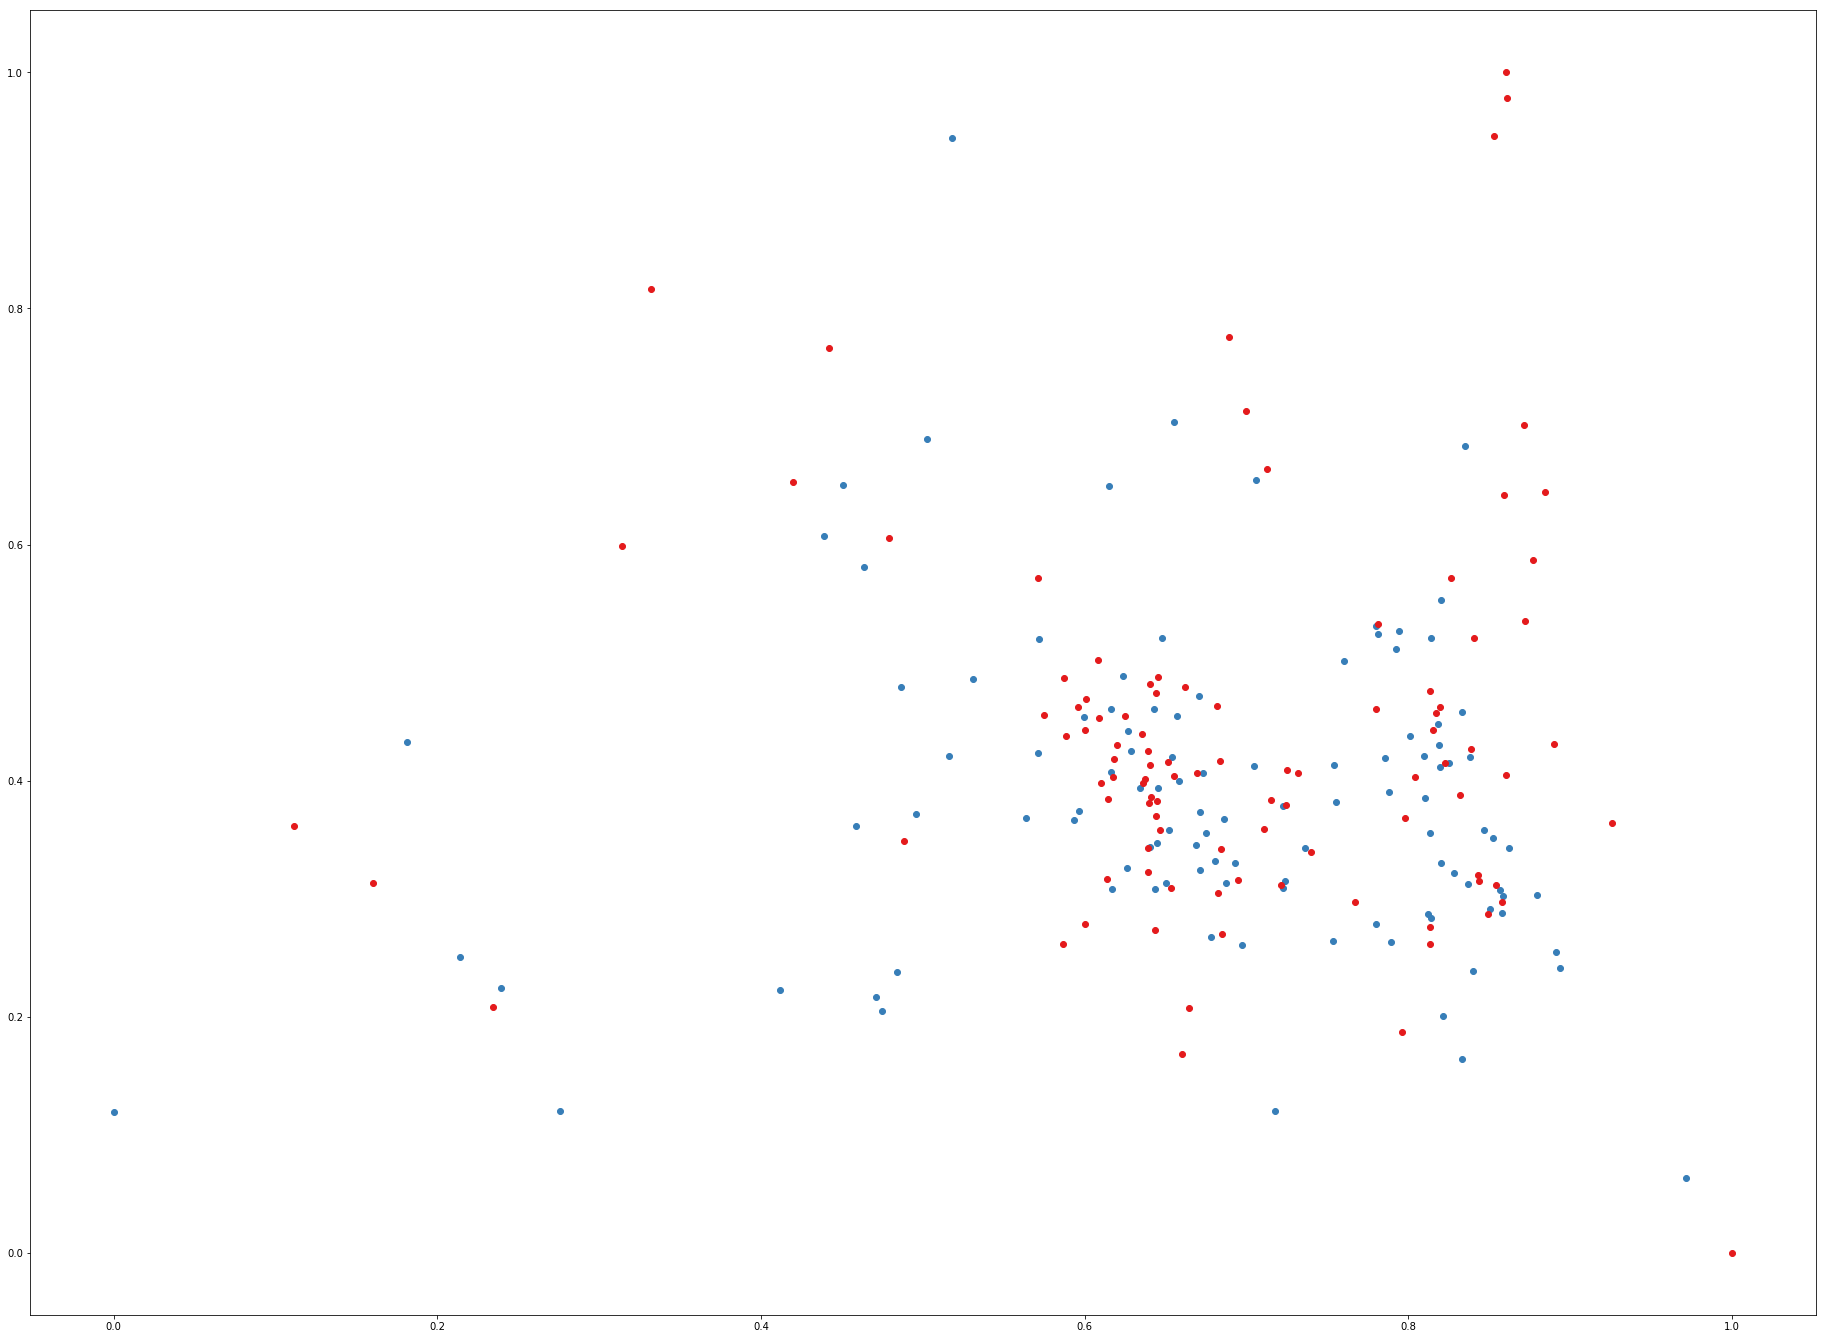

In [156]:
X = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(final)
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)
plt.figure(figsize=[32,24])
#Y = manifold.LocallyLinearEmbedding(n_neighbors=3, n_components=2,
#                                      method='standard').fit_transform(neg_final_matrix)
#y_min, y_max = np.min(Y, 0), np.max(Y, 0)
#Y = (Y - y_min) / (y_max - y_min)



pos_count = pos_final_matrix.shape[0]
neg_count = neg_final_matrix.shape[0]
for i in range(pos_count):
    plt.scatter(X[i, 0], X[i, 1], c = plt.cm.Set1(1))
for i in range(neg_count):      
    plt.scatter(X[pos_count+i, 0], X[pos_count+i, 1], c = plt.cm.Set1(0))
plt.show()

The 300-d word2vecs are obtained from a pretrained model. Seems not good.

In [157]:
count_vect_3 = CountVectorizer()
counts_3 = count_vect_3.fit_transform(pos_bag_of_word+neg_bag_of_word)
counts_3.shape

(2000, 23920)

In [158]:
tfidf_transformer = TfidfTransformer()
tfidf_3 = tfidf_transformer.fit_transform(counts_3)
tfidf_3.shape

(2000, 23920)

In [160]:
total_word_attribute = count_vect_3.get_feature_names()
tfidf_3=tfidf_3.toarray()
tfidf_3=tfidf_3.tolist()

In [161]:
positive_matrix = {}
negative_matrix = {}
for i in import_positive:
    k = total_word_attribute.index(i)
    positive_matrix[i] = [tfidf_3[j][k] for j in range(len(tfidf_3))]
    
        
for i in import_negative:
    k = total_word_attribute.index(i)
    negative_matrix[i] = [tfidf_3[j][k] for j in range(len(tfidf_3))]
pos_final_word = []
pos_final_matrix = []
for i in positive_matrix.keys():
    pos_final_word.append(i)
    pos_final_matrix.append(positive_matrix[i])
# get the vectors using word's tf-idf value in each documents     

In [162]:
neg_final_word = []
neg_final_matrix = []
for i in negative_matrix.keys():
    neg_final_word.append(i)
    neg_final_matrix.append(negative_matrix[i])

In [163]:
pos_final_matrix = np.array(pos_final_matrix)
neg_final_matrix = np.array(neg_final_matrix)
#pos_final_matrix
print(pos_final_matrix.shape)
print(neg_final_matrix.shape)
final = np.vstack((pos_final_matrix, neg_final_matrix))

(202, 2000)
(179, 2000)


(381, 2)


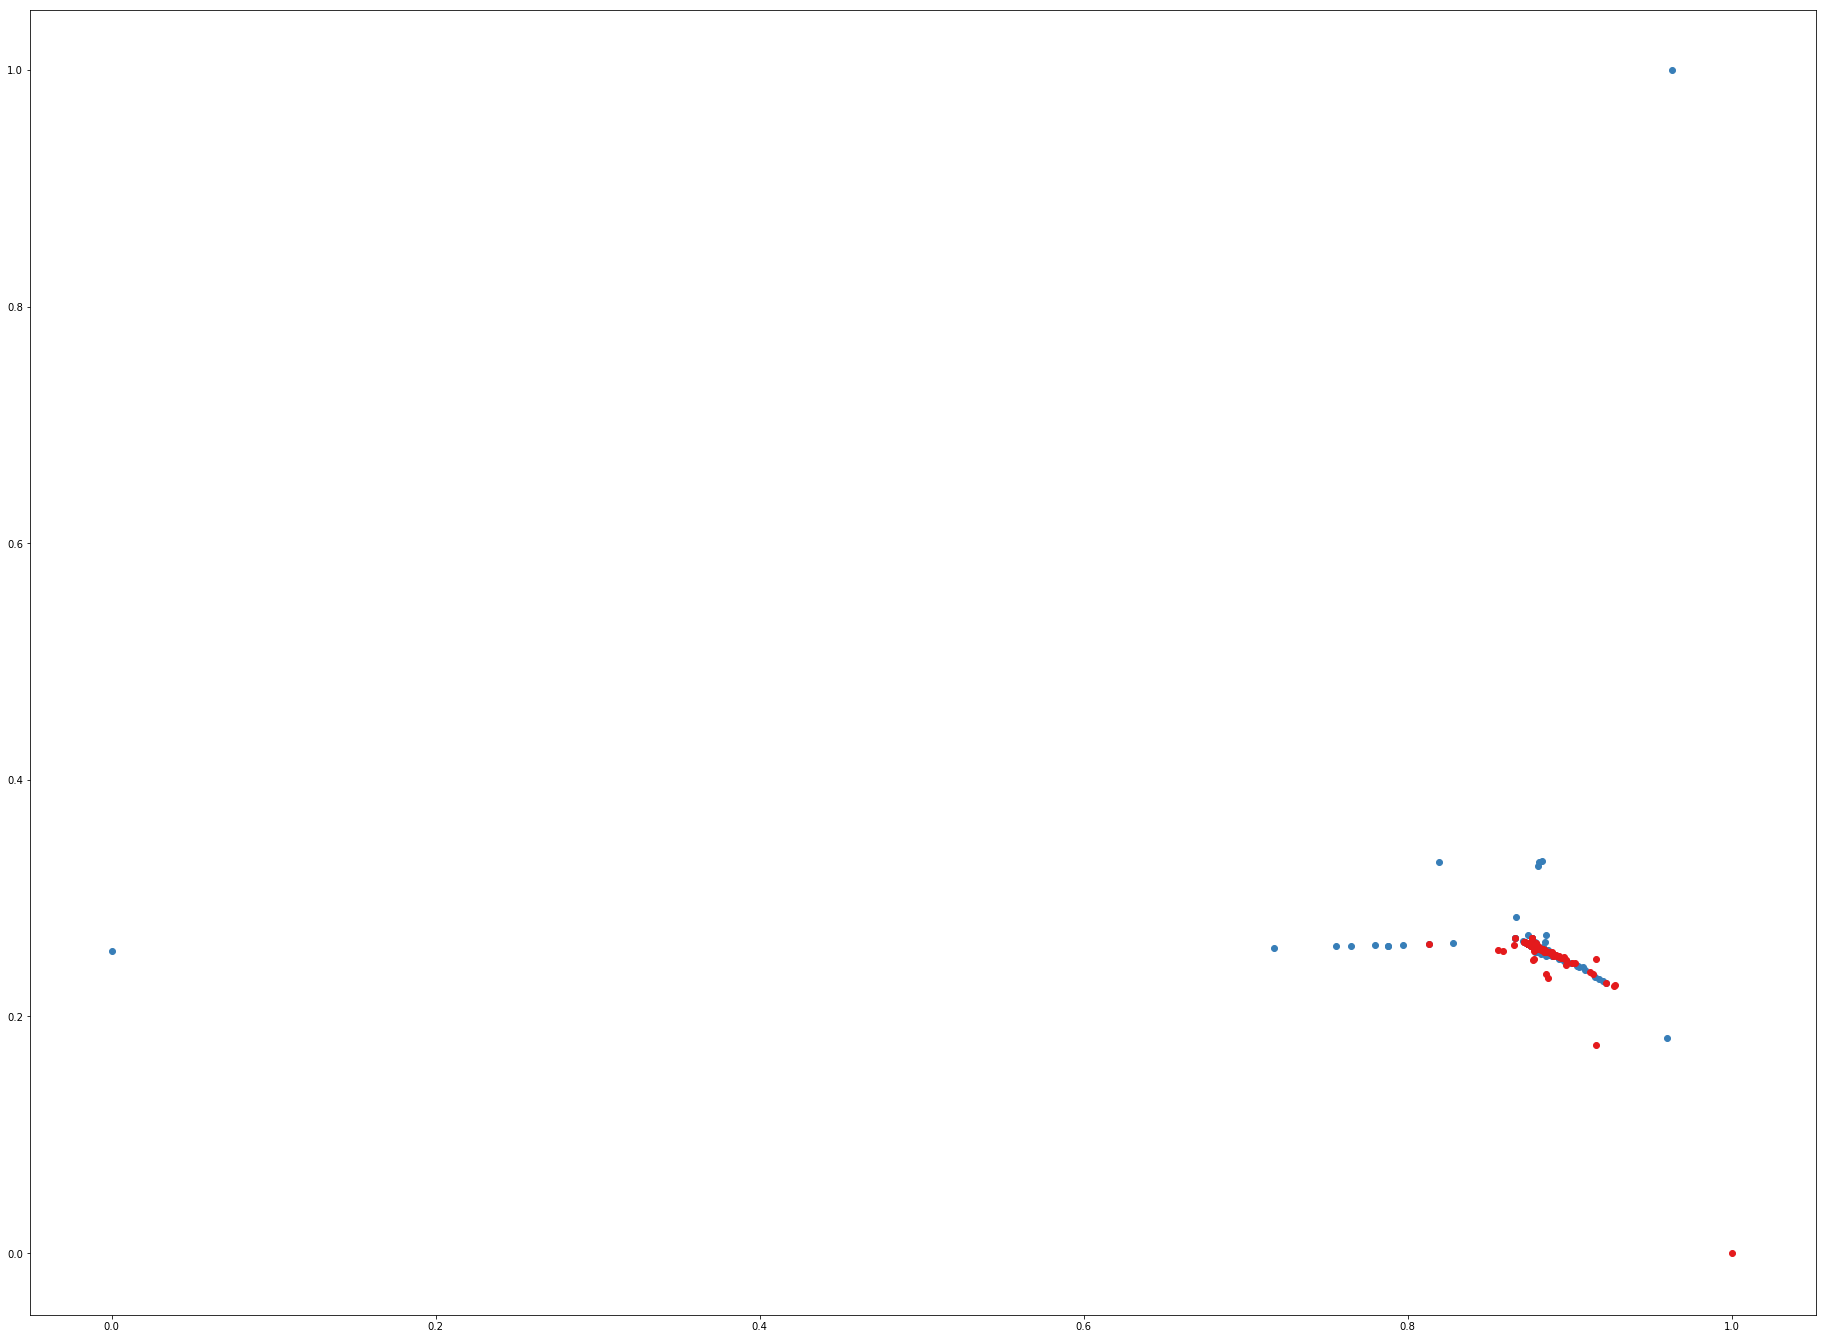

In [164]:
X = manifold.Isomap(n_neighbors=15, max_iter=500, n_components=2).fit_transform(final)
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)
plt.figure(figsize=[32,24])
print(X.shape)
#print(Y.shape)
pos_count = pos_final_matrix.shape[0]
neg_count = neg_final_matrix.shape[0]
for i in range(pos_count):
    plt.scatter(X[i, 0], X[i, 1], c = plt.cm.Set1(1))
for i in range(neg_count):      
    plt.scatter(X[pos_count+i, 0], X[pos_count+i, 1], c = plt.cm.Set1(0))
plt.show()

It is obvious that some positive words can be seperated in this plot. But the majority is still overlapping.
So we tried another method-> generating word2vec from the project documents.

In [168]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 15 11:55:58 2017

@author: Shepardlee
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from sklearn.manifold import TSNE
from sklearn import manifold
import matplotlib.pyplot as plt
import logging
import pandas as pd


def build_dataset(words, n_words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    return dictionary

def loading(pos,neg):
    global countpos
    global countneg
    data = pd.DataFrame(columns=['text'])
    os.chdir(neg)
    arr = os.listdir()
    list_polarity = []
    for file in arr:
        text = str()
        if file[len(file)-1]=="t":
            for line in open(file):
                text = text+line.replace('\n', '')
        b = pd.DataFrame([{'text':text}],columns=['text'])
        data = data.append(b,ignore_index=True)
        list_polarity.append(0)
      #list_polarity = list_polarity +(np.random.choice(2, 1).tolist())


    mylist = pd.DataFrame(' '.join(data['text'].tolist()), columns=['text'], index=[0])
    mylist = mylist['text'][0].split(' ')
    clean_listneg = [e for e in mylist if e not in (',', '.','?','"','--','the','a','and','of')]
    n_words = len(set(clean_listneg))
    countneg = build_dataset(clean_listneg, n_words)

    data = pd.DataFrame(columns=['text'])
    os.chdir(pos)
    arr = os.listdir()
    list_polarity = []
    for file in arr:
        text = str()
        if file[len(file)-1]=="t":
            for line in open(file):		
                text = text+line.replace('\n', '')
        b = pd.DataFrame([{'text':text}],columns=['text'])
        data = data.append(b,ignore_index=True)
        list_polarity.append(1)
      #list_polarity = list_polarity +(np.random.choice(2, 1).tolist())


    mylist = pd.DataFrame(' '.join(data['text'].tolist()), columns=['text'], index=[0])
    mylist = mylist['text'][0].split(' ')
    clean_listpos = [e for e in mylist if e not in (',', '.','?','"','--','the','a','and','of')]
    n_words = len(set(clean_listpos))
    countpos = build_dataset(clean_listpos, n_words)    

    
    pol_dictionary = dict()

    for ele in countpos:
        if ele in countneg:
            if countneg[ele] > countpos[ele]:
                pol_dictionary[ele] = 1
            else:
                pol_dictionary[ele] = 0

    for ele in countneg:
        if ele in countpos:
            if countneg[ele] > countpos[ele]:
                pol_dictionary[ele] = 1
            else:
                pol_dictionary[ele] = 0
    clean_list = clean_listpos+ clean_listneg
    return pol_dictionary, clean_list

pol_dictionary, clean_list = loading('/Users/zhengxiaoyu/Downloads/txt_sentoken/pos',
                                     '/Users/zhengxiaoyu/Downloads/txt_sentoken/neg')

vocabulary = clean_list
del clean_list
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 5000


def build_dataset(words, n_words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        index = dictionary.get(word, 0)
        if index == 0:  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reversed_dictionary

# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer[:] = data[:span]
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
   # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
    print(batch[i], reverse_dictionary[batch[i]],
            '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 300  # Dimension of the embedding vector.
skip_window = 4       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.
num_sampled = 60      # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)


graph = tf.Graph()

with graph.as_default():

   # Input data.
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

   # Ops and variables pinned to the CPU because of missing GPU implementation
    with tf.device('/cpu:0'):
      # Look up embeddings for inputs.
        embeddings = tf.Variable(
            tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
        embed = tf.nn.embedding_lookup(embeddings, train_inputs)

      # Construct the variables for the NCE loss
        nce_weights = tf.Variable(
            tf.truncated_normal([vocabulary_size, embedding_size],
                                          stddev=1.0 / math.sqrt(embedding_size)))
        nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

   # Compute the average NCE loss for the batch.
   # tf.nce_loss automatically draws a new sample of the negative labels each
   # time we evaluate the loss.
   # Explanation of the meaning of NCE loss:
   #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
    loss = tf.reduce_mean(
         tf.nn.nce_loss(weights=nce_weights,
                               biases=nce_biases,
                               labels=train_labels,
                               inputs=embed,
                               num_sampled=num_sampled,
                               num_classes=vocabulary_size))

   # Construct the SGD optimizer using a learning rate of 1.0.
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

   # Compute the cosine similarity between minibatch examples and all embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(
         normalized_embeddings, valid_dataset)
    similarity = tf.matmul(
         valid_embeddings, normalized_embeddings, transpose_b=True)

   # Add variable initializer.
    init = tf.global_variables_initializer()

# Step 5: Begin training.
num_steps = 15000

with tf.Session(graph=graph) as session:
   # We must initialize all variables before we use them.
    init.run()
    print('Initialized')

    average_loss = 0
    for step in xrange(num_steps):
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

      # We perform one update step by evaluating the optimizer op (including it
      # in the list of returned values for session.run()
        _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
         # The average loss is an estimate of the loss over the last 2000 batches.
                print('Average loss at step ', step, ': ', average_loss)
                average_loss = 0

      # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in xrange(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8  # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = 'Nearest to %s:' % valid_word
                for k in xrange(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log_str = '%s %s,' % (log_str, close_word)
                print(log_str)
    final_embeddings = normalized_embeddings.eval()

# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename, pol_dictionary):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(20, 20))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        if label in pol_dictionary:
            if pol_dictionary[label]==0:
                #0 means negative review
                plt.scatter(x, y,marker='x', color='r')
            else:
                plt.scatter(x, y,marker='o', color='g')
        else:
            plt.scatter(x, y,marker='p', color='b')
        plt.annotate(label,
                         xy=(x, y),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
        plt.show()

    #plt.savefig(filename)
except ImportError as ex:
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')
    print(ex)
    

#X = final_embeddings[random.sample(range(1, vocabulary_size), plot_only), :]    
#from minisom import MiniSom
## Training the SOM
#som = MiniSom(x = 10, y = 10, input_len = 300, sigma = 1.0, learning_rate = 0.5)
##input len is the dimension of X
#som.random_weights_init(X)
##random initiation of weight
#som.train_random(data = X, num_iteration = 100)
#
## Visualizing the results
#from pylab import bone, pcolor, colorbar, plot, show
#
#bone()
#pcolor(som.distance_map().T)
#colorbar()
#markers = ['o', 's']
#colors = ['r', 'g']
#for i, x in enumerate(X):
#    w = som.winner(x)
#    plot(w[0] + 0.5,
#         w[1] + 0.5,
#         markers[y[i]],
#         markeredgecolor = colors[y[i]],
#         markerfacecolor = 'None',
#         markersize = 10,
#         markeredgewidth = 2)
#show()

def find(words):
    print("pos",countpos[words])
    print("neg",countneg[words])
    


/Users/zhengxiaoyu/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Data size 1147047
Most common words (+UNK) [['UNK', 160030], ('to', 31759), ('is', 25163), ('in', 21591), ('that', 15105)]
Sample data [95, 2753, 27, 358, 1742, 29, 92, 1050, 630, 631] ['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'success', 'whether']
2753 adapted -> 27 from
2753 adapted -> 95 films
27 from -> 2753 adapted
27 from -> 358 comic
358 comic -> 27 from
358 comic -> 1742 books
1742 books -> 358 comic
1742 books -> 29 have
Initialized
Nearest to this: schwarzenegger, superman, christina, forces, friendship, jumps, follow, guilt,
Nearest to on: understandable, determined, shane, melodrama, willis, 12, affairs, crowe,
Nearest to first: connected, gloria, ideas, speech, clean, appreciated, costumes, bulworth,
Nearest to from: voices, studios, havoc, believe, dating, thurman, nightclub, angel,
Nearest to you: remotely, sexuality, ass, expert, evidence, inane, pain, casting,
Nearest to will: audiences, meanwhile, depressed, proof, factor, politics, urban

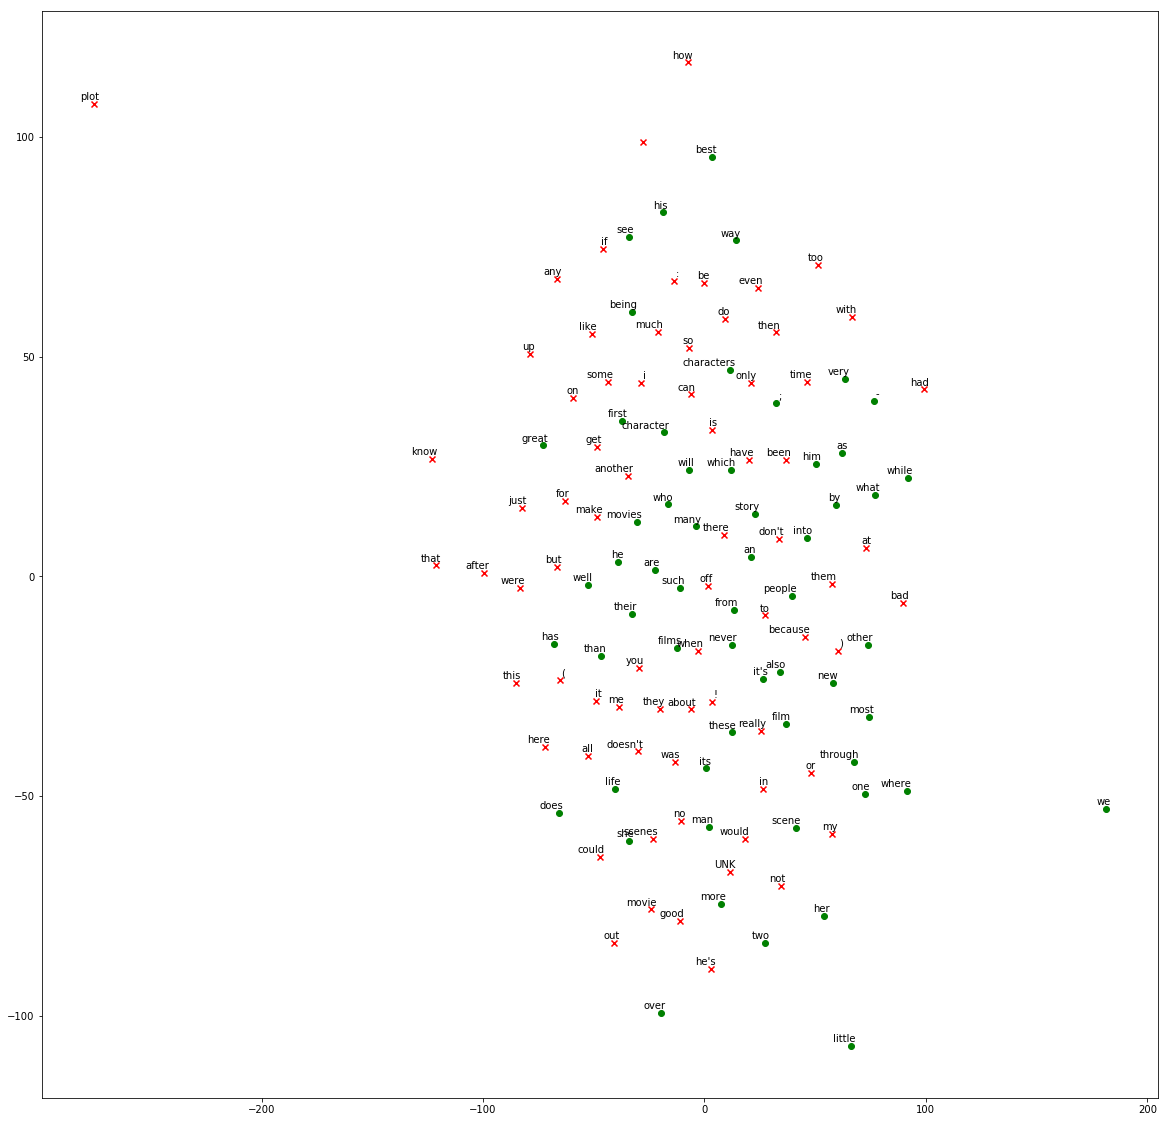

In [171]:
def plot_with_labels(low_dim_embs, labels, filename, pol_dictionary):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(20, 20))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        if label in pol_dictionary:
            if pol_dictionary[label]==0:
                #0 means negative review
                plt.scatter(x, y,marker='x', color='r')
            else:
                plt.scatter(x, y,marker='o', color='g')
        else:
            plt.scatter(x, y,marker='p', color='b')
        plt.annotate(label,
                         xy=(x, y),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()
    
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 130
   #tsne = manifold.SpectralEmbedding(n_components=2,n_neighbors=40)
   #tsne = manifold.MDS(n_components=2, max_iter=100, n_init=1)
   #low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
low_dim_embs = tsne.fit_transform(final_embeddings[random.sample(range(1, vocabulary_size), plot_only), :])
labels = [reverse_dictionary[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'),pol_dictionary)



# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **